# <center> Project: **Customer Intelligence** department in a Bank company: real world examples of a **Data Scientist** in a Bank company. Part II: Extra bonus - Regression model for car price estimation

# Project goals:
In this part of the project, we continue working as a Data Scientist in our Bank company facing to new challenges in the area of Machine Learning. 

In particular, the Bank credit department is realizing that a lot of customers are asking credits to purchase second-hand vehicles. Until now they have used a price reference book but this last is not too accurate and the final consequence is the Bank is not measuring correctly the risk of granting these credits.

Therefore, as a Customer Intelligence team member, you will be responsible for designing, developing and analyzing a model to estimate the price of a second hand vehicle based on its main characteristics. To do it we will use a **Multilayer Perceptron (MLP)** architecture.

### Due date: up to Junem 18th at 23:59h. 
### Submission procedure: via Moodle.

# Step 1: Data gathering

In this part of the Project we are using a new dataset named `CarPrice.csv`. This file contains information of **205 of cars** and 26 features that describes the main characteristics of every car. Some examples of these ones are:

- *car_ID*: It's an integer that identifies any car.
- *symboling*: It's an integer that identifies a car category
- *CarName*: Manufacture and model of the car
- *fueltype*: Type of fuel that the car uses 
- ...
- *price*: The current price of the car in the market


Let's upload some libraries and function we will need to develop our model.

In [2]:
# Imports
import numpy as np 
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.animation as animation


#%matplotlib notebook
import matplotlib.cm as cm
import seaborn as sns
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error

**[EX0]** Upload the car price into a Dataframe named `car_price_dt`. You should obtain a dataframe similar to this one.

In [3]:
car_price_dt = pd.read_csv('car_prediction.csv')
car_price_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Step 2: Data understanding and preparation

Once we know the problem to solve, the next stage is to have a clear understanding of the data we have extracted and to prepare it before modelling. In particular, we will:
- List and verify the type of each variable (object, float, int...). Identify variables with nulls. Measure the memory usage
- Eliminate rows with nulls in order to have a dataset 100% fulfilled
- Exploratory Data Analysis to understand main statistics (mean, standard deviation, min&max values and 25%-50%-75% quartiles) and distribution of the most relevant variables or features
- Plot several graphs in order to identify how variables are related between them. In particular:
- correlation matrix
- 2D and 3D scatter plots

Once this part, also known as **data wrangling** of the Project is done, we should achieve a deep knowledge about the data.

### **[EX1]** Is there any null variable to fix?

No. Como podemos observar en el output de info(), observamos que de 205 samples, todos sus valores estan marcados como non-null.

### **[EX2]** Calculate the quartiles, maximum and minimum values for numeric features

In [4]:
quartiles = car_price_dt.quantile(q=[0.25, 0.5, 0.75], axis=0, numeric_only=True)
max = car_price_dt.max(numeric_only=True)
min = car_price_dt.min(numeric_only=True)

### **[EX3]** Plot the distribution of the column `price`

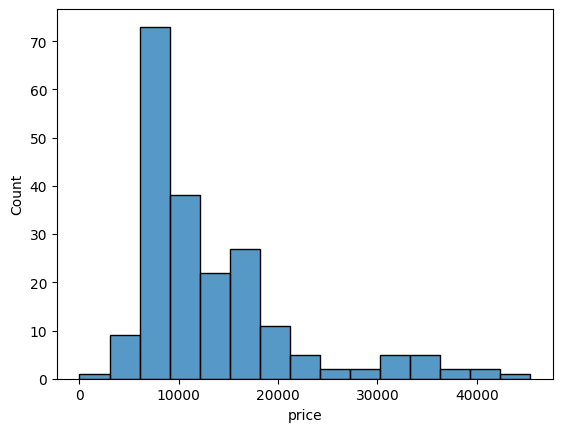

In [5]:
sns.histplot(data=car_price_dt, x="price", bins=15); plt.show()

### **[EX4]** Plot the correlation matrix between numerical features


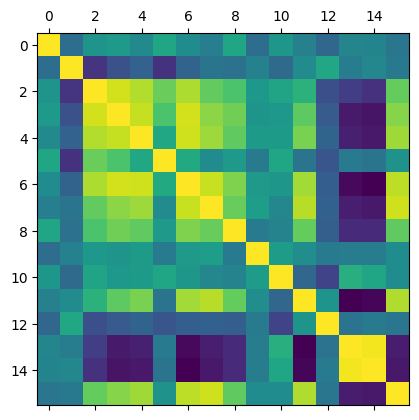

In [6]:
training_dt = car_price_dt.copy()
training_dt.select_dtypes('number')
    

plt.matshow(pd.DataFrame.corr(training_dt.select_dtypes('number'))); plt.show()

### **[EX5]** Look at the correlation matrix results. Do you think a model to predict car price is feasible? Justify your answer.

### **[EX6]** Filter from the previous dataset (i.e. `car_price_dt`) the following columns: `symboling`, `wheelbase`, `carlength, `carwidth`, `carheight`, `curbweight`, `enginesize`, `boreratio`, `stroke`, `compressionratio`, `horsepower`, `peakrpm`, `citympg`, `highwaympg`, `price`. Normalize with **StandardScaler()** function all these features. Finally, create new arrays: `y` with the `price` column and `x` with the rest of features.

In [7]:
car_price_dt_f = car_price_dt.filter(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'], axis=1)
car_price_dt_f.info()
sS = StandardScaler()
sS.fit(car_price_dt_f)
car_price_dt_f = sS.transform(car_price_dt_f)
x = car_price_dt_f[:,0:14]
y = car_price_dt_f[:,14]

car_df = car_price_dt.filter(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'], axis=1)
price_df = car_price_dt.filter(['price'], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   wheelbase         205 non-null    float64
 2   carlength         205 non-null    float64
 3   carwidth          205 non-null    float64
 4   carheight         205 non-null    float64
 5   curbweight        205 non-null    int64  
 6   enginesize        205 non-null    int64  
 7   boreratio         205 non-null    float64
 8   stroke            205 non-null    float64
 9   compressionratio  205 non-null    float64
 10  horsepower        205 non-null    int64  
 11  peakrpm           205 non-null    int64  
 12  citympg           205 non-null    int64  
 13  highwaympg        205 non-null    int64  
 14  price             205 non-null    float64
dtypes: float64(8), int64(7)
memory usage: 24.1 KB


# Step 3: Training the model and performance evaluation: Regression model to estimate the price of a car based on vehicles's features.

### **[EX7]** Build some **utils** functions we will need for our MLP architecture. Create:
- *sigmoid* function that calculates the sigmoid of a value, array, etc....
- *sigmoid_derivative* funtion that calculates the derivative of sigmoid for a value p.
- *relu* function that calculates the relu of a value, array, etc....
- *relu_derivative* funtion that calculates the derivative of relu for a value x.

In [8]:
def do_nothing(a):
    return a

def do_nothing_derivative(a):
    return np.ones(a.shape)

def sigmoid(a):
    return 1 / (1 + np.exp(-a))

def sigmoid_derivative(a):
    return sigmoid(a) * 1 - (sigmoid(a))

def relu(a):
    returnval = np.where(a>=0, a, 0)
    return returnval

def relu_derivative(a):
    returnval = np.where(a>=0, 1, 0)
    return returnval

### **[EX8]** Split `x`and `y`into `xtrain`, `xtest`, `ytrain`, `ytest` with 20% of total samples for testing usage.

In [57]:
xtrain, xtest, ytrain, ytest, cartrain, cartest, pricetrain, pricetest = train_test_split(x, y, car_df, price_df, train_size=0.8, random_state= 1)
print(xtrain.shape)
print(xtest.shape)

(164, 14)
(41, 14)


### **[EX9]** Complete the following code to build of MLP solution with 1 hidden layer. In particular, you should:
- 1) complete the **feedforward** method. Select the activation function of the utils section that you consider suitable for this use case (i.e. car price estimation).
- 2) complete the **backpropagation** method
- 3) build the **predict** method that calculates the output of the MLP based on the last calculated weights during the training process.

In [120]:
# Class definition
class NeuralNetwork:
    def __init__(self, x,y):
        self.input = x
        self.number_neurons_hidden=10
        #print (self.input.shape[1]+1)
        self.weights1= np.random.rand((self.input.shape[1]+1),self.number_neurons_hidden) # considering we have number_neurons_hidden nodes in the hidden layer and include and extra w for w0
        #print ("Initialized weights layer1\n",self.weights1)
        self.weights2 = np.random.rand((self.number_neurons_hidden+1),1)# considering we have number_neurons_hidden nodes in the hidden layer and include and extra w for w0 for last neuron
        #print("Initialized weights layer2\n",self.weights2)
        self.y = y
        self.output = np.zeros(y.shape)
        self.lr=0.0001
        #print("\nWeights 1 Shape:\n", self.weights1.shape)
        #print("\nWeights 2 Shape:\n", self.weights2.shape)

        self.z_1 = []
        self.z_2 = []
        
    def feedforward(self, activartion_function = do_nothing):
        #We add a column of "1" to input_data to multiply with w0 at first hidden layer
        self.input_aux=np.c_[np.ones(self.input.shape[0]), self.input]
        #Calculate the output of the first layer
        #self.layer1_output =
        z_1 = []
        for i in range(self.input.shape[0]):
            z_1.append(np.asarray(self.weights1.T @ self.input_aux[i].T).reshape(-1))
        z_1 = np.matrix(z_1)        
        self.z_1 = z_1
        a_1 = activartion_function(z_1)
        self.layer1_output = a_1
        


        #We add a column of "1" to input data to the second layer to multiply with w0 at second layer
        self.layer1_output_aux=np.c_[np.ones(self.layer1_output.shape[0]),self.layer1_output]

        #Calculate the output of the first (second?) layer
        #self.layer2_output =
        z_2 = []
        for i in range(z_1.shape[0]):
            z_2.append(np.asarray(self.weights2.T @ self.layer1_output_aux[i].T).reshape(-1))
        z_2 = np.matrix(z_2)
        self.z_2 = z_2
        a_2 = activartion_function(z_2)    
        self.layer2_output = a_2

        # print(self.layer1_output)
        # print(self.layer2_output)
        # print(self.output)

        self.output=self.layer2_output
        return self.output
        
    def backpropagation(self, activation_derivative = do_nothing_derivative, learning_rate = 0.5):
        m = self.input.shape[0]
        #Calculate the gradient of the Error vs the output
        #gradient_output =
        gradient_cost_2 = self.output - self.y
        gradient_activation_2 = activation_derivative(self.z_2)
        delta_2 = np.multiply(gradient_cost_2, gradient_activation_2)
        # print("\ngradient_cost_2\n", gradient_cost_2.shape)
        # print("\ngradient_activation_2\n", gradient_activation_2.shape)
        # print("\ndelta_2\n", delta_2.shape)

        gradient_cost_1 = []
        for i in range(self.input.shape[0]):
            aux = []
            for j in range(self.weights2.shape[0] - 1):
                aux.append( (np.asarray(delta_2[i]).reshape(-1) @ self.weights2[j + 1]))
            gradient_cost_1.append(aux)
        gradient_cost_1 = np.matrix(gradient_cost_1)   
        # print("\ngradient_cost_1\n", gradient_cost_1.shape)     
        gradient_activation_1 = activation_derivative(self.z_1)
        delta_1 = np.multiply(gradient_cost_1, gradient_activation_1)
        # print("\ngradient_activation_1\n", gradient_activation_1.shape)
        # print("\ndelta_1\n", delta_1.shape)


        # print("\layer1_output_aux\n", self.layer1_output_aux.shape)
        # print("\input_aux\n", self.input_aux.shape)

        #Calculate the gradient of the Error vs weigths at layer 2
        #gradient_weights2 = 
        gradient_weights2 = []
        for iterations in range(self.input.shape[0]):
            # print(delta_2.shape)
            # print(np.matrix(delta_2[iterations]).shape); print(np.matrix(self.layer1_output_aux[iterations]).shape)
            gradient_weights2 = np.matrix(self.layer1_output_aux[iterations]).T @ np.matrix(delta_2[iterations])
            # print("\nGradient Weights 2\n", gradient_weights2.shape)
            self.weights2 -= self.lr * gradient_weights2


        #Calculate the gradient of the Error vs weigths at layer 1
        #gradient_weights1 = 
        gradient_weights1 = []
        for iterations in range(self.input.shape[0]):
            gradient_weights1 = np.matrix(self.input_aux[iterations]).T @ delta_1[iterations]
            # print("\nGradient Weights 1\n", gradient_weights1.shape)
            self.weights1 -= self.lr * gradient_weights1

        #Update the weights1 and weights2 according to gradient_weights1 and gradient_weights2 previously calculated and the learning_rate defined at the constructor of the NeuralNetwork class
        #self.weights1=
        #self.weights2=   
        # print(delta_1)

    def train(self, X, y, activartion_function = do_nothing ,activartion_derivative = do_nothing_derivative):
        self.output = self.feedforward(activartion_function = activartion_function)
        self.backpropagation(activartion_derivative)

    def predict(self, X_pred, activartion_function = do_nothing):
    
        self.input_predict=X_pred
        #Calculate the output of the MLP using the chosen activation function and the weights at layers 1 and 2 once fitted. 
            #We add a column of "1" to input_data to multiply with w0 at first hidden layer
        self.input_aux=np.c_[np.ones(self.input_predict.shape[0]), self.input_predict]
        #Calculate the output of the first layer
        #self.layer1_output =
        z_1 = []
        for i in range(self.input_predict.shape[0]):
            z_1.append(np.asarray(self.weights1.T @ self.input_aux[i].T).reshape(-1))
        z_1 = np.matrix(z_1)        
        a_1 = activartion_function(z_1)
        
        #We add a column of "1" to input data to the second layer to multiply with w0 at second layer
        self.layer1_output_aux=np.c_[np.ones(a_1.shape[0]),a_1]

        #Calculate the output of the first (second?) layer
        #self.layer2_output =
        z_2 = []
        for i in range(z_1.shape[0]):
            z_2.append(np.asarray(self.weights2.T @ self.layer1_output_aux[i].T).reshape(-1))
        z_2 = np.matrix(z_2)
        a_2 = activartion_function(z_2)    
        #print(a_2)
        return a_2


We are ready to train our model. Execute the following code to train our MLP based on xtrain and ytrain. Tip: Maybe ytrain should be reshaped to be adjusted to be an array.

In [139]:
#Vector to store the loss in every iteration
loss=[]
#Create the neural network
NN = NeuralNetwork(xtrain,ytrain.reshape(-1,1))
#Number of iterations
epochs=100
for i in range(epochs):
    # NN.train(xtrain, ytrain, relu, relu_derivative)
    NN.train(xtrain, ytrain)
    loss.append(np.mean(np.square(y - NN.feedforward())))
    #print(loss)

Use the following **summarize_diagnostics** function to plot the loss.

In [13]:
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Loss')
    pyplot.plot(history, color='blue', label='train')
    pyplot.legend(loc="lower center", fontsize=14)
    return

### **[EX10]** Plot the **loss** obtained during the training stage of the MLP. Describe the visualization

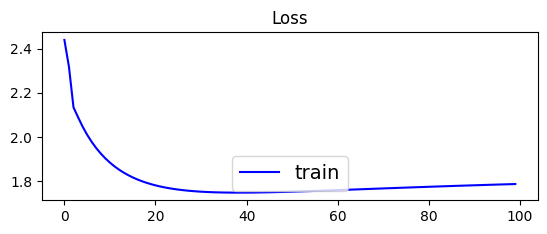

In [140]:
summarize_diagnostics(loss)

Podemos observar que el algoritmo converge a la estabilidad en menos de 100 epochs.

### **[EX11]** Execute the **predict** method of the NeuralNetwork class for xtest. Answer the following questions:
- (1) Which is the performance of the model using ytest. Is it a good model? Justify your answer.
- (2) Which is the mean absolute error at the original scale of the dataset (i.e. previously to normalization)?
- (3) In case of a not too good performance, how would you tune the MLP solution (i.e. which parameters of the NN would you modify)? Execute the training and predict process again with this new setup and compare with the previous results. Are the results (i.e. R2 score and mean absolute error) as you expected? Justify your answer.


In [141]:
prediction = NN.predict(xtest)
# print("Prediction:\n", np.asarray(prediction).reshape(-1))
print("ERROR Standarized:\n", np.mean(np.square(ytest - prediction)))


prediction_car = NN.predict(xtest)
prediction_car = sS.inverse_transform(np.asarray(np.c_[xtest, prediction_car]))
print("ERROR Original Scale:\n", np.mean(np.square(np.array(pricetest) - prediction_car)))



ERROR Standarized:
 1.470637718518469
ERROR Original Scale:
 178210458.753729


En el modelo estandarizado podemos observar un Error Medio bastante pequeño, de entre 1 a 2 en los casos mas habituales. Si usamos este entrenamiento para predecir datos originales, pero, tenemos un error bastante considerable. El error en la escala original esta entre 15M y 18M de dolares cuadrados (si hacemos la raiz cuadrada es aproximadamente un error de 4000$). Podemos ver que pese a no ser perfecto, un error de 4000$ sobre el precio de un coche se podria considerar aceptable. Sobre como podriamos mejorar el algoritmo, hemos pensado que cambiando el número de neuronas y el learning rate podriamos obtener unos resultados mejores, pero no ha sido el caso. Si augmentamos demasiado el numero de neuronas o el learning rate podemos incluso hacer que el algoritmo converga hacia un error infinito, que no interesa. Otro caso podria ser disminuirlos, ya que es posible que el problema sea el overfitting. Observamos en las graficas como el algoritmo converge en las primeras 50 iteraciones,y que despues o se mantiene estable o augmenta ligeramente. Por tanto igual podriamos parar antes de tiempo. Sin embargo, tampoco vemos cambios importantes en el comportamiento del algoritmo. 

Otro caso sería probar la función relu como función de activación. De nuevo, obtenemos resultados similares para numero de epoch pequeños, y algo peores para epoch grandes.